## Crime against women in India
This project contains the data record of all types of crime against women in India in the span year 2001-2014.

In [ ]:
!pip install opendatasets --upgrade --quiet

In [ ]:
import opendatasets as od
download_url = "https://www.kaggle.com/datasets/greeshmagirish/crime-against-women-20012014-india"
od.download(download_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: juhishah11
Your Kaggle Key: ··········


100%|██████████| 174k/174k [00:00<00:00, 27.8MB/s]

In [ ]:
!pip install pandas --upgrade --quiet
!pip install matplotlib --quiet
!pip install seaborn --quiet

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
data_filename = '/content/crime-against-women-20012014-india/crimes_against_women_2001-2014.csv'

In [ ]:
crime_df = pd.read_csv(data_filename)

In [ ]:
crime_df

,Unnamed: 0,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
0,0,ANDHRA PRADESH,ADILABAD,2001,50,30,16,149,34,175,0
1,1,ANDHRA PRADESH,ANANTAPUR,2001,23,30,7,118,24,154,0
2,2,ANDHRA PRADESH,CHITTOOR,2001,27,34,14,112,83,186,0
3,3,ANDHRA PRADESH,CUDDAPAH,2001,20,20,17,126,38,57,0
4,4,ANDHRA PRADESH,EAST GODAVARI,2001,23,26,12,109,58,247,0
...,...,...,...,...,...,...,...,...,...,...,...
10672,832,Lakshadweep,Lakshadweep,2014,1,0,0,1,2,0,0
10673,833,Lakshadweep,Total District(s),2014,1,0,0,1,2,0,0
10674,834,Puducherry,Karaikal,2014,3,1,0,12,1,1,0
10675,835,Puducherry,Puducherry,2014,7,6,1,20,7,3,0


In [ ]:
crime_df.columns

Index(['Unnamed: 0', 'STATE/UT', 'DISTRICT', 'Year', 'Rape',
       'Kidnapping and Abduction', 'Dowry Deaths',
       'Assault on women with intent to outrage her modesty',
       'Insult to modesty of Women', 'Cruelty by Husband or his Relatives',
       'Importation of Girls'],
      dtype='object')

### Data Preparation and Cleaning
To start with the very basic of data cleaning, let's find out if any of the columns have any null values

In [ ]:
crime_df.isna().sum()

Unnamed: 0                                             0
STATE/UT                                               0
DISTRICT                                               0
Year                                                   0
Rape                                                   0
Kidnapping and Abduction                               0
Dowry Deaths                                           0
Assault on women with intent to outrage her modesty    0
Insult to modesty of Women                             0
Cruelty by Husband or his Relatives                    0
Importation of Girls                                   0
dtype: int64

#### Now let's find the total number of unique districts, where the crimes have been committed

In [ ]:
district = crime_df.DISTRICT.unique()

In [ ]:
len(district)

1605

#### But there are 718 districts in India, in total, which means there is messy or false datas in a huge amount, in this case, we better drop the column "District" and also "Unnamed: 0", as it is of no use, in our data analysis process.

In [ ]:
crime_df = crime_df.drop(['DISTRICT','Unnamed: 0'], axis=1)

In [ ]:
crime_df = crime_df.rename( columns = {'Kidnapping and Abduction':'Kidnapping_Abduction','Dowry Deaths':'Dowry_Deaths',
                             'Assault on women with intent to outrage her modesty':'Hurting_of_womens_modesty',
                             'Insult to modesty of Women':'Insult_to_womens_modesty',
                             'Cruelty by Husband or his Relatives':'Domestic_Cruelty',
                             'Importation of Girls':'Importation_of_Girls'})

In [ ]:
crime_df

,STATE/UT,Year,Rape,Kidnapping_Abduction,Dowry_Deaths,Hurting_of_womens_modesty,Insult_to_womens_modesty,Domestic_Cruelty,Importation_of_Girls
0,ANDHRA PRADESH,2001,50,30,16,149,34,175,0
1,ANDHRA PRADESH,2001,23,30,7,118,24,154,0
2,ANDHRA PRADESH,2001,27,34,14,112,83,186,0
3,ANDHRA PRADESH,2001,20,20,17,126,38,57,0
4,ANDHRA PRADESH,2001,23,26,12,109,58,247,0
...,...,...,...,...,...,...,...,...,...
10672,Lakshadweep,2014,1,0,0,1,2,0,0
10673,Lakshadweep,2014,1,0,0,1,2,0,0
10674,Puducherry,2014,3,1,0,12,1,1,0
10675,Puducherry,2014,7,6,1,20,7,3,0


In [ ]:
crime_df['STATE/UT'].unique()

array(['ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR',
       'CHHATTISGARH', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH',
       'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA',
       'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM',
       'NAGALAND', 'ODISHA', 'PUNJAB', 'RAJASTHAN', 'SIKKIM',
       'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND',
       'WEST BENGAL', 'A & N ISLANDS', 'CHANDIGARH', 'D & N HAVELI',
       'DAMAN & DIU', 'DELHI', 'LAKSHADWEEP', 'PUDUCHERRY',
       'Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar',
       'Chhattisgarh', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jammu & Kashmir', 'Jharkhand', 'Karnataka', 'Kerala',
       'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram',
       'Nagaland', 'Odisha', 'Punjab', 'Rajasthan', 'Sikkim',
       'Tamil Nadu', 'Tripura', 'Uttar Pradesh', 'Uttarakhand',
       'West Bengal', 'A&N Islands', 'Chandigarh', 'D&N Haveli',
       '

#### We can see from above that there are lot many repeated datas, like some of them are repeated again by using capital letters and some of them have issues with space too, like A&N Islands and also Delhi has been repeated again by mentioning it as Delhi UT

In [ ]:
crime_df["STATE/UT"]=crime_df.apply(lambda row:row['STATE/UT'].replace(" ","").lower(),axis=1)

In [ ]:
crime_df['STATE/UT'].replace("delhiut","delhi",inplace=True)

In [ ]:
states = crime_df['STATE/UT'].unique()

In [ ]:
len(states)

36

# Exploratory Analysis and Visualization

#### Let us find out the total population of women over the years, 2001-2014, who has been a victim of the crime based on their gender.

In [ ]:
victims_raped = crime_df.Rape.sum()
victims_kidnapped_abducted = crime_df.Kidnapping_Abduction.sum()
dowery_death = crime_df.Dowry_Deaths.sum()
modesty_assault = crime_df.Hurting_of_womens_modesty.sum()
insult_to_modesty = crime_df.Insult_to_womens_modesty.sum()
domestic_violence = crime_df.Domestic_Cruelty.sum()
girls_imported = crime_df.Importation_of_Girls.sum()

In [ ]:
total_population_of_victim_overall = victims_raped + victims_raped + dowery_death +modesty_assault+ insult_to_modesty + domestic_violence+ girls_imported
total_population_of_victim_overall

5194570

#### This above analysis potrays a heartbreaking situation of women in our society, as more than 5 million number of females, over the years 2001-2014, have been a victim of assault, violance, rape or even death, in India alone.  

# Year by year Analysis

In [ ]:
crime_df['total_crimes']=(crime_df['Rape']+crime_df['Kidnapping_Abduction']+crime_df['Dowry_Deaths']+
                       crime_df['Hurting_of_womens_modesty']+
                       crime_df['Insult_to_womens_modesty']+crime_df['Domestic_Cruelty']+
                       crime_df['Importation_of_Girls'])

In [ ]:
crime_df.columns

Index(['STATE/UT', 'Year', 'Rape', 'Kidnapping_Abduction', 'Dowry_Deaths',
       'Hurting_of_womens_modesty', 'Insult_to_womens_modesty',
       'Domestic_Cruelty', 'Importation_of_Girls', 'total_crimes'],
      dtype='object')

In [ ]:
crimes = ['Rape','Kidnapping_Abduction','Dowry_Deaths','Hurting_of_womens_modesty',
          'Insult_to_womens_modesty','Domestic_Cruelty','Importation_of_Girls','total_crimes']

df_1 = pd.DataFrame()
for i in crimes:
  df_1[i] = crime_df.groupby(['Year'])[i].sum()

print("******* Total number of crimes from 2001 to 2014 *******")
print()
df_1 

******* Total number of crimes from 2001 to 2014 *******



,Rape,Kidnapping_Abduction,Dowry_Deaths,Hurting_of_womens_modesty,Insult_to_womens_modesty,Domestic_Cruelty,Importation_of_Girls,total_crimes
Year,,,,,,,,
2001,32150,29290,13702,68248,19492,98340,228,261450
2002,32746,29012,13644,67886,20310,98474,152,262224
2003,31694,26592,12416,65878,24650,101406,92,262728
2004,36466,31156,14052,69134,20002,116242,178,287230
2005,36718,31500,13574,68350,19968,116638,298,287046
2006,38696,34828,15236,73234,19932,126256,134,308316
2007,41474,40832,16186,77468,21900,151860,122,349842
2008,42934,45878,16344,80826,24428,162688,134,373232
2009,42794,51482,16766,77422,22018,179092,96,389670


In [ ]:
crime_df.columns

Index(['STATE/UT', 'Year', 'Rape', 'Kidnapping_Abduction', 'Dowry_Deaths',
       'Hurting_of_womens_modesty', 'Insult_to_womens_modesty',
       'Domestic_Cruelty', 'Importation_of_Girls', 'total_crimes'],
      dtype='object')

In [ ]:
## PLOT YEAR BY YEAR ANALYSIS

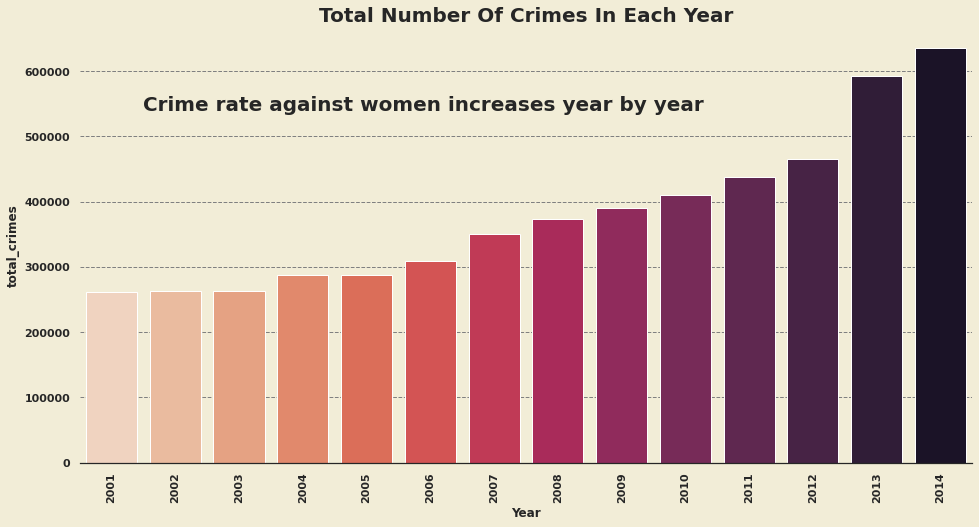

In [ ]:
sns.set_theme(style='white',context='notebook')

fig=plt.figure(figsize=(16,8))

ax=plt.axes()
ax.set_facecolor("#F2EDD7FF")
fig.patch.set_facecolor("#F2EDD7FF")

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(linestyle="--",axis="y",color='gray')

lower_year=2001
upper_year=2014
arr=[]
for i in range(lower_year,upper_year+1):
    arr.append(i)
arr=np.array(arr)
sns.barplot(data=df_1,x=arr,y='total_crimes',palette='rocket_r')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.text(0.5,540000,"Crime rate against women increases year by year",fontweight='bold',fontsize=20)
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel("Year",fontweight='bold')
plt.ylabel("total_crimes",fontweight='bold')
plt.title("Total Number Of Crimes In Each Year",fontweight='bold',fontsize=20)
plt.show()

### Rape Cases

Text(0.5, 1.0, 'Chart of rape cases in India in 2001-2014')

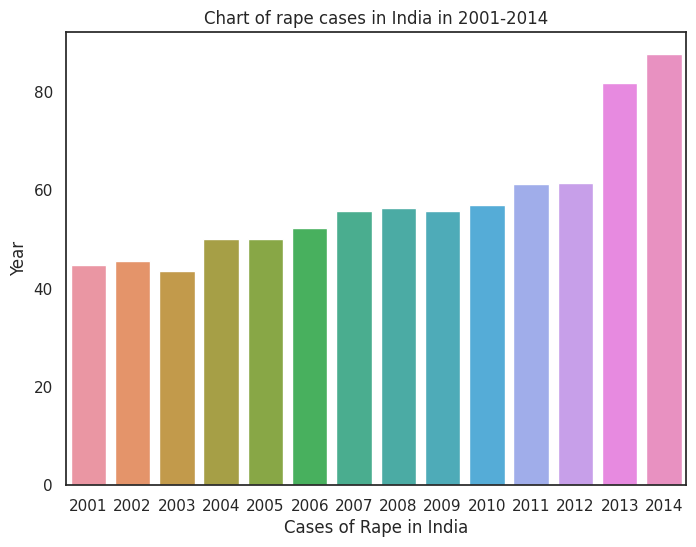

In [ ]:
plt.figure(figsize=(8,6),dpi=100)
sns.barplot(data=crime_df,x=crime_df.Year,y=crime_df.Rape,ci=None)
plt.xlabel("Cases of Rape in India")
plt.ylabel("Year")
plt.title("Chart of rape cases in India in 2001-2014")


### Kidnapping Abduction Cases

Text(0.5, 1.0, 'Chart of Kidnapping and Abduction cases in India in2001 to 2014')

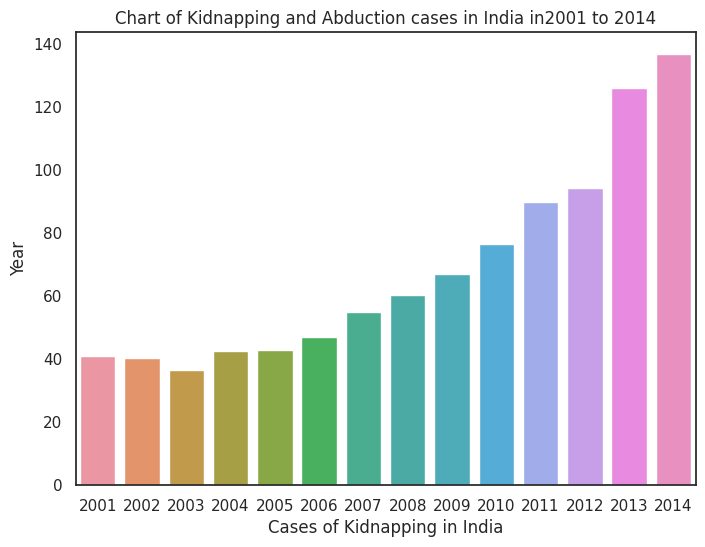

In [ ]:
plt.figure(figsize=(8,6),dpi=100)
sns.barplot(data=crime_df,x=crime_df.Year,y=crime_df.Kidnapping_Abduction,ci=None)
plt.xlabel("Cases of Kidnapping in India")
plt.ylabel("Year")
plt.title("Chart of Kidnapping and Abduction cases in India in2001 to 2014")

### Dowry Death Cases

Text(0.5, 1.0, 'Chart of Dowry death cases in India in 2001-2014')

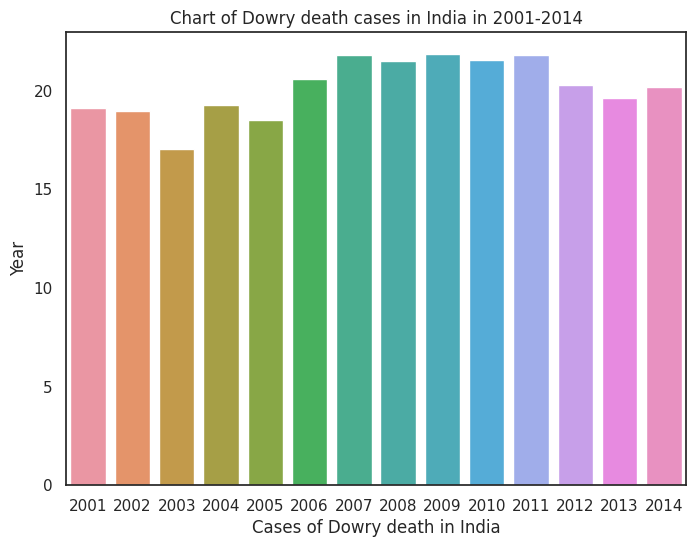

In [ ]:
plt.figure(figsize=(8,6),dpi=100)
sns.barplot(data=crime_df,x=crime_df.Year,y=crime_df.Dowry_Deaths,ci=None)
plt.xlabel("Cases of Dowry death in India")
plt.ylabel("Year")
plt.title("Chart of Dowry death cases in India in 2001-2014")

Assualt Cases

Text(0.5, 1.0, 'Chart of Assaulting a women for her modesty cases in India in 2001-2014')

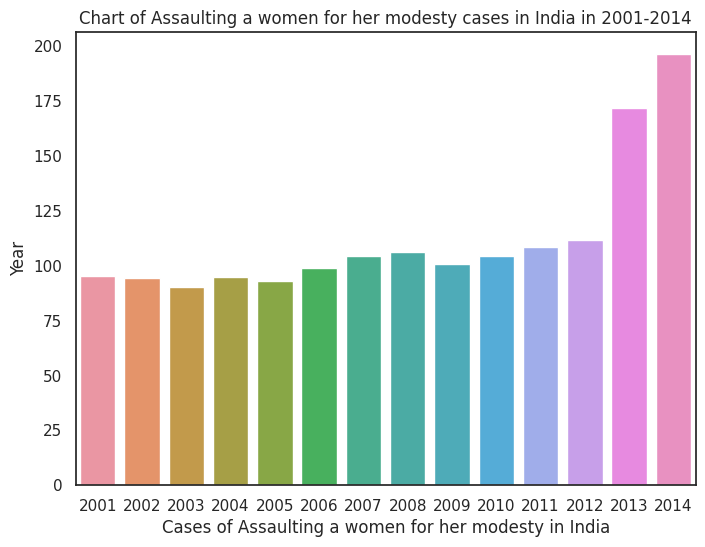

In [ ]:
plt.figure(figsize=(8,6),dpi=100)
sns.barplot(data=crime_df,x=crime_df.Year,y=crime_df.Hurting_of_womens_modesty,ci=None)
plt.xlabel("Cases of Assaulting a women for her modesty in India")
plt.ylabel("Year")
plt.title("Chart of Assaulting a women for her modesty cases in India in 2001-2014")

### Domestic Violence cases

Text(0.5, 1.0, 'Chart of Domestic Violence cases in India in 2001-2014')

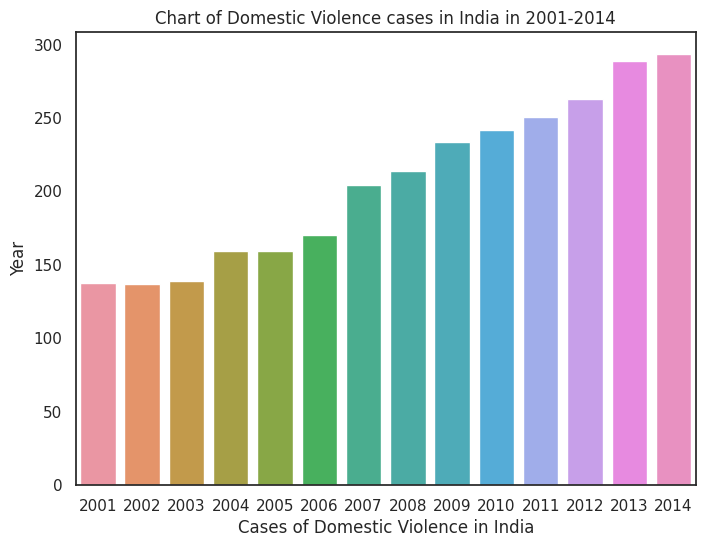

In [ ]:
plt.figure(figsize=(8,6),dpi=100)
sns.barplot(data=crime_df,x=crime_df.Year,y=crime_df.Domestic_Cruelty,ci=None)
plt.xlabel("Cases of Domestic Violence in India")
plt.ylabel("Year")
plt.title("Chart of Domestic Violence cases in India in 2001-2014")

### Importation Cases

Text(0.5, 1.0, 'Chart of Importation of girls cases in India in 2001-2014')

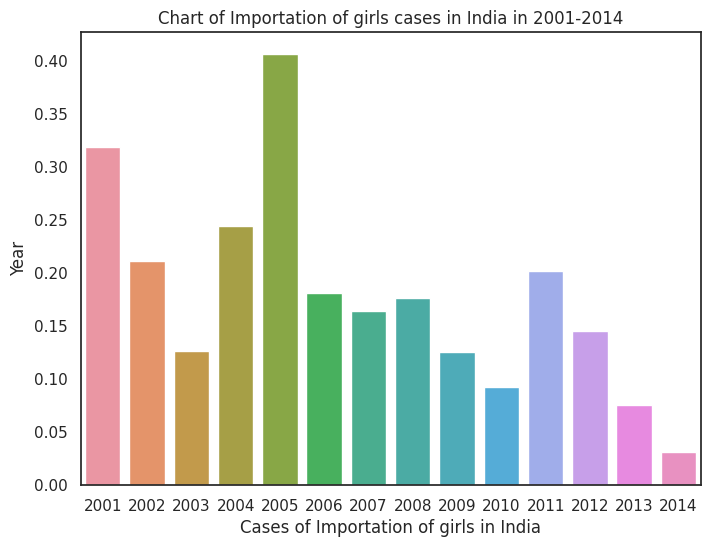

In [ ]:
plt.figure(figsize=(8,6),dpi=100)
sns.barplot(data=crime_df,x=crime_df.Year,y=crime_df.Importation_of_Girls,ci=None)
plt.xlabel("Cases of Importation of girls in India")
plt.ylabel("Year")
plt.title("Chart of Importation of girls cases in India in 2001-2014")

### There are two things to be concluded from the above bar chart -

####      1) The cases have incraesed over the years.

####       2) 2014 has been the year, where violance against women was reported the maximum, under each of the cases like, rape, domestic violence etc, which can also be proved below, which can also be cross examined with the code below.

In [ ]:
count_df = crime_df.groupby('Year')[['STATE/UT']].count()
count_df

,STATE/UT
Year,
2001,716
2002,719
2003,728
2004,729
2005,733
2006,740
2007,743
2008,761
2009,767


#### Let us use seaborn to take help of heatmap to represent how more cases from each state started coming up more frequently with each passing year.

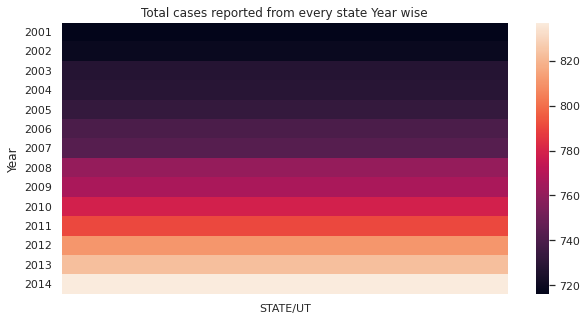

In [ ]:
plt.figure(figsize=(10,5))
plt.title("Total cases reported from every state Year wise")
sns.heatmap(count_df);

#### It gives us the conclusion that overall(cases under each category), from every state, has increased with time, not decreased.

# Asking and Answering Questions

### As part of this data analysis, it is very crucial to raise question and find answer to them. Here we will try to find out some of the most essential questions, that will help us in drawing a major conclusion from our dataset.

#### Q . Create a dataframe containing 10 highest reported rape cases in India, in the span of year 2001-2014.

In [ ]:
max_rape_case = crime_df[['Rape','STATE/UT','Year']]
max_rape_case.sort_values(by='Rape',ascending=False)[:10]

,Rape,STATE/UT,Year
10244,5076,madhyapradesh,2014
9426,4335,madhyapradesh,2013
10445,3759,rajasthan,2014
10595,3467,uttarpradesh,2014
10291,3438,maharashtra,2014
8611,3425,madhyapradesh,2012
7810,3406,madhyapradesh,2011
9628,3285,rajasthan,2013
7025,3135,madhyapradesh,2010
9472,3063,maharashtra,2013


#### We see from the analysis, the top states that reported the maximum number of rape cases, along with the year, in which they occured.
#### Where, Madhya Pradesh reported the maximum rape cases in the year 2014.

### Q. Create a dataframe containing 10 highest reported deaths caused by Dowry cases in India, in the span of year 2001-2014.

In [ ]:
max_dowry_death_cases = crime_df[['Dowry_Deaths','STATE/UT','Year']]
max_dowry_death_cases.sort_values(by='Dowry_Deaths',ascending=False)[:10]

,Dowry_Deaths,STATE/UT,Year
10595,2469,uttarpradesh,2014
9760,2335,uttarpradesh,2013
8132,2322,uttarpradesh,2011
8938,2244,uttarpradesh,2012
5796,2237,uttarpradesh,2008
6563,2232,uttarpradesh,2009
7342,2217,uttarpradesh,2010
650,2211,uttarpradesh,2001
5040,2076,uttarpradesh,2007
1366,1893,uttarpradesh,2002


#### From our analysis, we observe that the highest reported dowry death was in Uttar Pradesh in 2014, with number of reports being 2469.

##### One more here to be observed as well is that, Uttar Pradesh is the ONLY state that appears in this list.

### Q. Create a dataframe containing 10 highest reported Domestic Violance cases in India, in the span of year 2001-2014.

In [ ]:
max_domestic_violance_cases = crime_df[['Domestic_Cruelty','STATE/UT','Year']]
max_domestic_violance_cases.sort_values(by='Domestic_Cruelty',ascending=False)[:10]

,Domestic_Cruelty,STATE/UT,Year
10640,23278,westbengal,2014
8982,19865,westbengal,2012
8172,19772,westbengal,2011
9804,18116,westbengal,2013
7381,17796,westbengal,2010
6602,16112,westbengal,2009
10445,15905,rajasthan,2014
9628,15094,rajasthan,2013
9050,15084,andhrapradesh,2013
5835,13663,westbengal,2008


#### According to our analysis, we see the maximum cases of Domestic Violance cases came from West Bengal in the year 2014, with number of cases reported being 23278.

### Q. Create a dataframe containing 10 highest reported Importation cases in India, in the span of year 2001-2014.

In [ ]:
max_importation_case = crime_df[['Importation_of_Girls','STATE/UT','Year']]
max_importation_case.sort_values(by='Importation_of_Girls',ascending=False)[:10]

,Importation_of_Girls,STATE/UT,Year
115,83,bihar,2001
3013,74,bihar,2005
3597,61,westbengal,2005
3590,60,westbengal,2005
4486,56,bihar,2007
3005,48,bihar,2005
7810,45,madhyapradesh,2011
3746,42,bihar,2006
102,39,bihar,2001
5378,39,jharkhand,2008


#### According to our analysis, maximum of Importation of girls has been reported in Bihar in the year 2001

## STATE BY STATE ANALYSIS

In [ ]:
print("***** Total number of Unique States/Union Territories we have in Data *****")
print()
states=crime_df['STATE/UT'].unique()
print("Number of states/territories without duplicates: ", len(states))
print()
print(states)

***** Total number of Unique States/Union Territories we have in Data *****

Number of states/territories without duplicates:  36

['andhrapradesh' 'arunachalpradesh' 'assam' 'bihar' 'chhattisgarh' 'goa'
 'gujarat' 'haryana' 'himachalpradesh' 'jammu&kashmir' 'jharkhand'
 'karnataka' 'kerala' 'madhyapradesh' 'maharashtra' 'manipur' 'meghalaya'
 'mizoram' 'nagaland' 'odisha' 'punjab' 'rajasthan' 'sikkim' 'tamilnadu'
 'tripura' 'uttarpradesh' 'uttarakhand' 'westbengal' 'a&nislands'
 'chandigarh' 'd&nhaveli' 'daman&diu' 'delhi' 'lakshadweep' 'puducherry'
 'telangana']


In [ ]:
crimes

['Rape',
 'Kidnapping_Abduction',
 'Dowry_Deaths',
 'Hurting_of_womens_modesty',
 'Insult_to_womens_modesty',
 'Domestic_Cruelty',
 'Importation_of_Girls',
 'total_crimes']

In [ ]:
df_state = pd.DataFrame()
for i in crimes:
  df_state_crimes= crime_df.groupby(['STATE/UT'])[i].sum()
  df_state[i] = df_state_crimes

print("***** Each cateogry of crimes in each state from 2001 to 2014 *****")
print()
df_state=df_state.sort_values(by='total_crimes',ascending=False)
df_state.reset_index()

***** Each cateogry of crimes in each state from 2001 to 2014 *****



,STATE/UT,Rape,Kidnapping_Abduction,Dowry_Deaths,Hurting_of_womens_modesty,Insult_to_womens_modesty,Domestic_Cruelty,Importation_of_Girls,total_crimes
0,uttarpradesh,51150,135906,57256,91212,53130,193738,6,582398
1,andhrapradesh,32150,34504,13844,126952,86964,280906,34,575354
2,westbengal,47876,61158,12308,66908,5348,344124,254,537976
3,rajasthan,45684,66278,11854,83362,794,262200,14,470186
4,madhyapradesh,90996,35608,21090,195478,20964,102816,134,467086
5,maharashtra,48974,30368,9696,114704,32634,193202,6,429584
6,assam,40190,62074,3268,38256,254,115300,22,259364
7,kerala,20030,4452,700,80438,7930,111626,0,225176
8,gujarat,11644,34670,1108,23186,3230,146468,0,220306
9,bihar,30758,57086,32206,16958,694,69770,904,208376


### Q. Find out the top 5 states, where maximum numbers of cases has been reported in TOTAL in span of 2001-2014, each category wise.

##### For "Rape" case -

In [ ]:
rape_df = crime_df.groupby('STATE/UT')['Rape'].sum()

In [ ]:
rape_df.sort_values(ascending=False)[:5]

STATE/UT
madhyapradesh    90996
uttarpradesh     51150
maharashtra      48974
westbengal       47876
rajasthan        45684
Name: Rape, dtype: int64

#### Madhya Pradesh has reported the highest number of rape cases in TOTAL in span of 2001-2014, where UP, Maharastra, West Bengal and Rajasthan follows the list.

##### For Kidnapping and abduction case -

In [ ]:
kidnapping_df = crime_df.groupby('STATE/UT')['Kidnapping_Abduction'].sum()
kidnapping_df.sort_values(ascending=False)[:5]

STATE/UT
uttarpradesh    135906
rajasthan        66278
assam            62074
westbengal       61158
bihar            57086
Name: Kidnapping_Abduction, dtype: int64

#### Uttar Pradesh has reported the highest number of cses under "Kidnapping and Abduction" in TOTAL in span of 2001-2014, where Rajasthan, Assam, West Bengal and Bihar follows the list.

##### For cases of deaths due to dowry -

In [ ]:
dowry_death_df = crime_df.groupby('STATE/UT')['Dowry_Deaths'].sum()
dowry_death_df.sort_values(ascending=False)[:5]

STATE/UT
uttarpradesh     57256
bihar            32206
madhyapradesh    21090
andhrapradesh    13844
westbengal       12308
Name: Dowry_Deaths, dtype: int64

#### Uttar Pradesh has reported the highest number of Deaths caused by Dowry cases in TOTAL in span of 2001-2014, where Bihar, Madhya Pradesh, Andhra Pradesh and  West Bengal follows the list.

##### For  Domestic Violance case -

In [ ]:
domestic_df = crime_df.groupby('STATE/UT')['Domestic_Cruelty'].sum()
domestic_df.sort_values(ascending=False)[:5]

STATE/UT
westbengal       344124
andhrapradesh    280906
rajasthan        262200
uttarpradesh     193738
maharashtra      193202
Name: Domestic_Cruelty, dtype: int64

#### West Bengal has reported the highest number of cases of Domestic Violence in TOTAL in span of 2001-2014, where Andhra Pradesh, Rajsthan, Uttar Pradesh and  Maharashtra follows the list.


##### For Importation of Girls case -

In [ ]:
importation_of_girls_df = crime_df.groupby('STATE/UT')['Importation_of_Girls'].sum()
importation_of_girls_df.sort_values(ascending=False)[:5]

STATE/UT
bihar            904
jharkhand        298
westbengal       254
madhyapradesh    134
karnataka         94
Name: Importation_of_Girls, dtype: int64

#### Bihar has reported the highest number of Importation of girl's cases in TOTAL in span of 2001-2014, where Jharkhand, West Bengal, Madhya Pradesh and  Karnataka follows the list.

## COMPARISON BETWEEN 2001 AND 2014

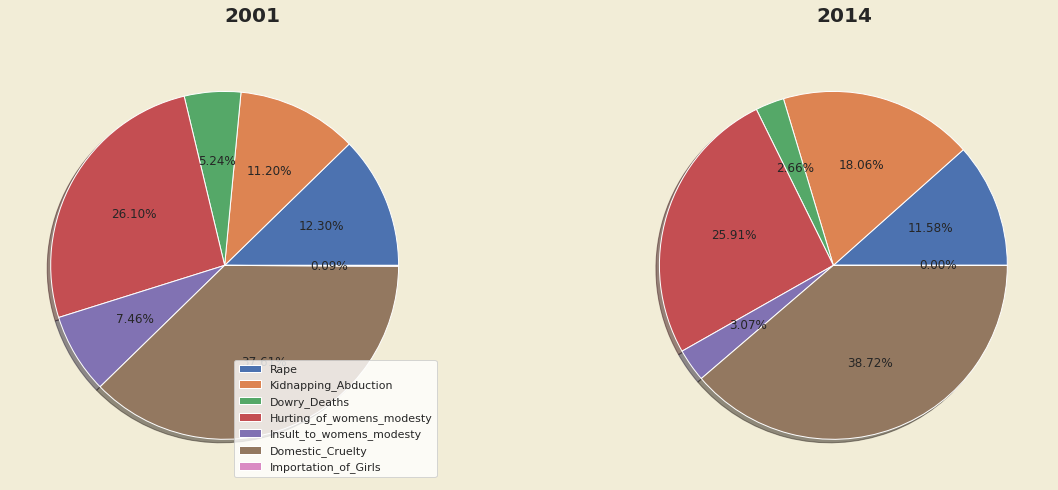

In [ ]:
df_2001=df_1.loc[df_1.index==2001]
df_2014=df_1.loc[df_1.index==2014]

df_2001=df_2001.drop(["total_crimes"],axis=1)
df_2014=df_2014.drop(["total_crimes"],axis=1)
crimes_in_2001=list(df_2001.iloc[0])
crimes_in_2014=list(df_2014.iloc[0])

f,ax=plt.subplots(1,2,figsize=(20,8))
f.patch.set_facecolor('#F2EDD7FF')
#Setting background and foreground color
for j in range(0,2):
    ax[j].set_facecolor('#F2EDD7FF')
    
ax[0].pie(crimes_in_2001,autopct='%1.2f%%',shadow=True)
ax[0].text(0,1.4,"2001",fontweight='bold',fontsize=20)
ax[1].pie(crimes_in_2014,autopct='%1.2f%%',shadow=True)
ax[0].text(3.4,1.4,"2014",fontweight='bold',fontsize=20)
ax[0].legend(labels=df_2001.columns,loc='lower right')

plt.show()
